In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
START = "2000-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('BA')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,41.4375,41.6875,39.8125,40.1875,25.940287,2638200
1,2000-01-04,40.1875,41.1250,39.7500,40.1250,25.899950,3592100
2,2000-01-05,41.3750,43.3125,41.3750,42.6250,27.513643,7631700
3,2000-01-06,42.6250,43.4375,41.1250,43.0625,27.796049,4922200
4,2000-01-07,43.6875,44.8750,43.6875,44.3125,28.602884,6008300


In [ ]:
df['Change'] = df['Close'].pct_change()
df.reset_index(drop=True, inplace=True)
df.fillna(df.mean(), inplace=True)
df.head()

<ipython-input-4-f66a6fdb882f>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume,Change
0,2000-01-03,41.4375,41.6875,39.8125,40.1875,25.940287,2638200,0.000509
1,2000-01-04,40.1875,41.1250,39.7500,40.1250,25.899950,3592100,-0.001555
2,2000-01-05,41.3750,43.3125,41.3750,42.6250,27.513643,7631700,0.062305
3,2000-01-06,42.6250,43.4375,41.1250,43.0625,27.796049,4922200,0.010264
4,2000-01-07,43.6875,44.8750,43.6875,44.3125,28.602884,6008300,0.029028


Visualizing Closing Price

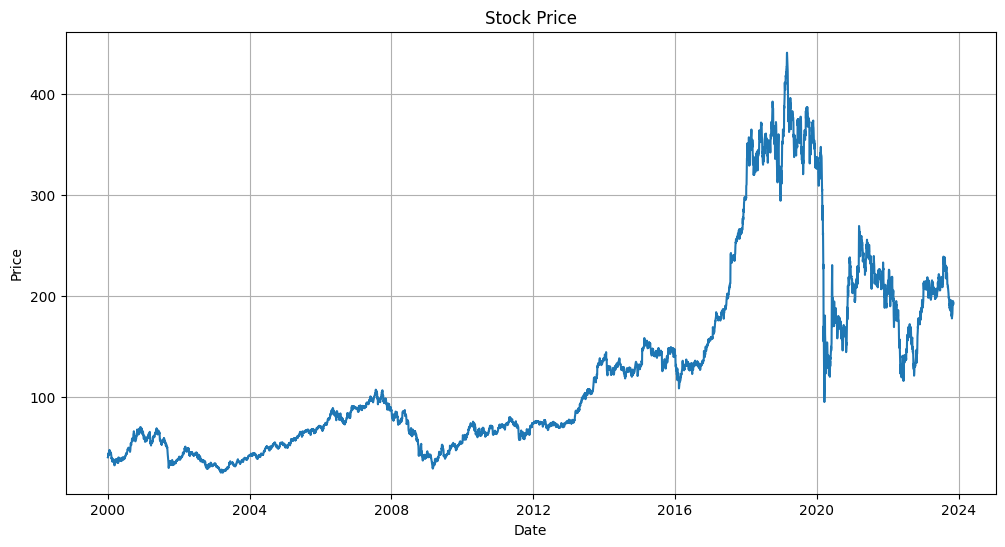

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

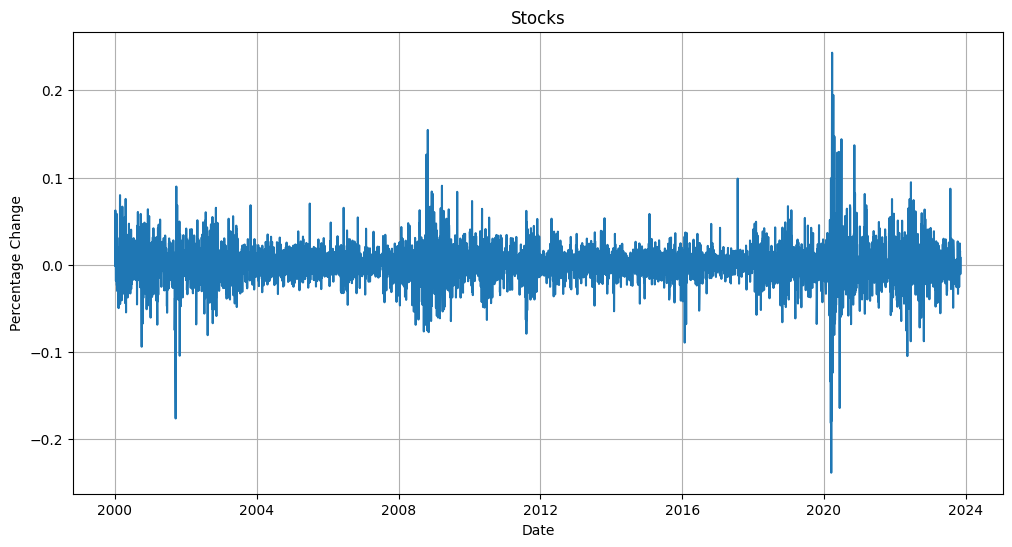

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Change'])
plt.title("Percenatge Change")
plt.xlabel("Date")
plt.ylabel("Percentage Change")
plt.grid(True)
plt.show()

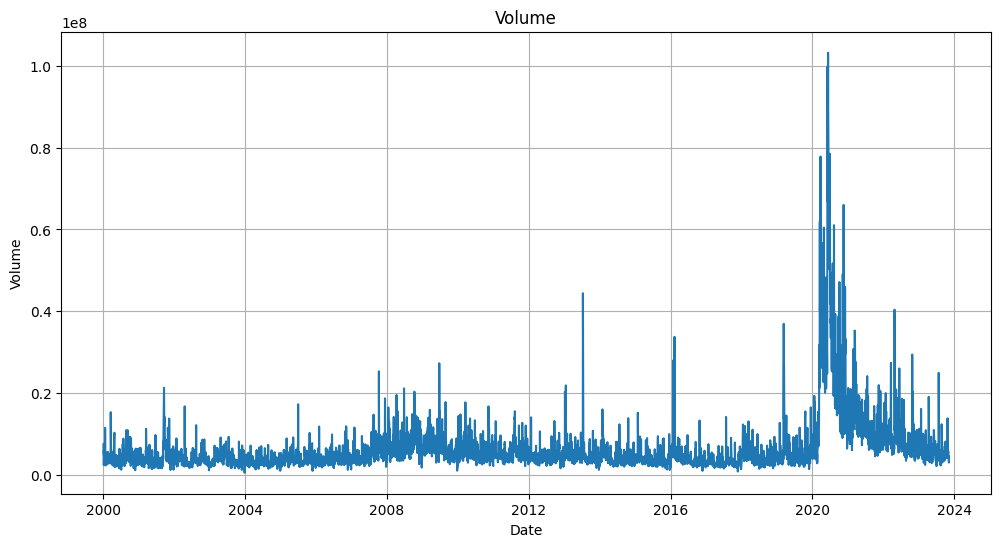

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'])
plt.title("Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6003 non-null   datetime64[ns]
 1   Open       6003 non-null   float64       
 2   High       6003 non-null   float64       
 3   Low        6003 non-null   float64       
 4   Close      6003 non-null   float64       
 5   Adj Close  6003 non-null   float64       
 6   Volume     6003 non-null   int64         
 7   Change     6003 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 375.3 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Change
count,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6.003000e+03,6003.000000
mean,124.858951,126.341620,123.324119,124.832947,112.287486,6.198028e+06,0.000509
std,92.878934,93.933313,91.779257,92.857797,96.151826,6.950193e+06,0.022219
min,25.000000,25.420000,24.730000,25.059999,16.991480,5.029000e+05,-0.238484
25%,58.619999,59.443750,57.695000,58.490000,40.809158,3.198150e+06,-0.009872
50%,85.029999,85.839996,84.209999,85.080002,63.517315,4.380500e+06,0.000446
75%,164.650002,167.364998,162.320000,164.404999,162.070000,6.431200e+06,0.010963
max,446.010010,446.010010,440.190002,440.619995,430.299957,1.032128e+08,0.243186


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Change       0
dtype: int64

In [ ]:
df.shape

(6003, 8)

# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(4202, 8)
(1801, 8)


In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change
0,2000-01-03,41.4375,41.6875,39.8125,40.1875,25.940287,2638200,0.000509
1,2000-01-04,40.1875,41.1250,39.7500,40.1250,25.899950,3592100,-0.001555
2,2000-01-05,41.3750,43.3125,41.3750,42.6250,27.513643,7631700,0.062305
3,2000-01-06,42.6250,43.4375,41.1250,43.0625,27.796049,4922200,0.010264
4,2000-01-07,43.6875,44.8750,43.6875,44.3125,28.602884,6008300,0.029028


In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change
4202,2016-09-15,127.570000,128.460007,126.940002,127.769997,117.558334,3462400,0.000783
4203,2016-09-16,127.709999,127.709999,126.339996,126.699997,116.573853,8035600,-0.008374
4204,2016-09-19,127.500000,128.300003,127.269997,127.480003,117.291496,3168100,0.006156
4205,2016-09-20,127.949997,128.500000,127.570000,127.790001,117.576729,2639300,0.002432
4206,2016-09-21,128.179993,130.630005,128.179993,130.559998,120.125328,3227800,0.021676


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.11352721],
       [0.11305817],
       [0.13181989],
       ...,
       [0.78844276],
       [0.77823637],
       [0.77005629]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape, y_train.shape

((4102, 100, 1), (4102,))

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1))))
model.add(Dropout(0.2))


model.add(Bidirectional(LSTM(units = 60, activation = 'relu', return_sequences=True)))
model.add(Dropout(0.3))


model.add(Bidirectional(LSTM(units = 80, activation = 'relu', return_sequences=True)))
model.add(Dropout(0.4))


model.add(Bidirectional(LSTM(units = 120, activation = 'relu')))
model.add(Dropout(0.5))

model.add(Dense(units = 1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

# Training the model

---



In [ ]:
history = model.fit(x_train, y_train, epochs=10,batch_size=40, verbose=1, shuffle =True)

Epoch 1/10
103/103 [==============================] - 136s 1s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0640
Epoch 2/10
103/103 [==============================] - 135s 1s/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0475
Epoch 3/10
103/103 [==============================] - 135s 1s/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0446
Epoch 4/10
103/103 [==============================] - 133s 1s/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0447
Epoch 5/10
103/103 [==============================] - 136s 1s/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0441
Epoch 6/10
103/103 [==============================] - 132s 1s/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0421
Epoch 7/10
103/103 [==============================] - 132s 1s/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0400
Epoch 8/10
103/103 [==============================] - 133s 1s/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0386
Epoch 9/10
103/103 [==============================] - 135s 1s/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0382
Epoch 10/1

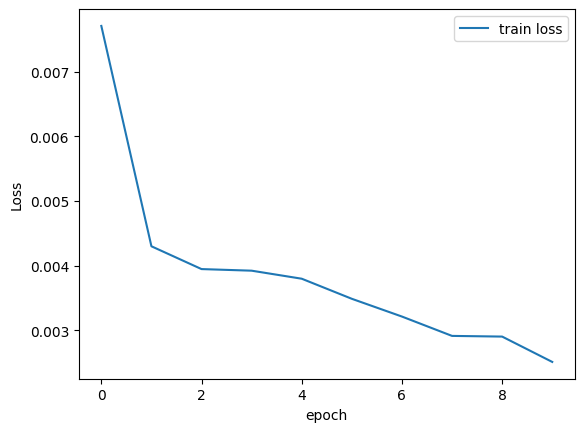

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_close.shape

(1801, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
final_df = past_100_days.append(test_df, ignore_index = True)

<ipython-input-49-50640d85f7a0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [ ]:
final_df.head()

,0
0,130.750000
1,133.240005
2,137.080002
3,134.800003
4,134.800003


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.10341136],
       [0.11061602],
       [0.1217268 ],
       ...,
       [0.27892712],
       [0.28014236],
       [0.28448251]])

In [ ]:
input_data.shape

(1901, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1801, 100, 1)
(1801,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

57/57 [==============================] - 7s 127ms/step


In [ ]:
y_pred.shape

(1801, 1)

In [ ]:
y_test

array([0.09478891, 0.09169294, 0.09394983, ..., 0.27892712, 0.28014236,
       0.28448251])

In [ ]:
y_pred

array([[0.10759175],
       [0.10660618],
       [0.10541362],
       ...,
       [0.26269498],
       [0.26538017],
       [0.26787275]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00289343])

In [ ]:
scale_factor = 1/scaler.scale_
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor


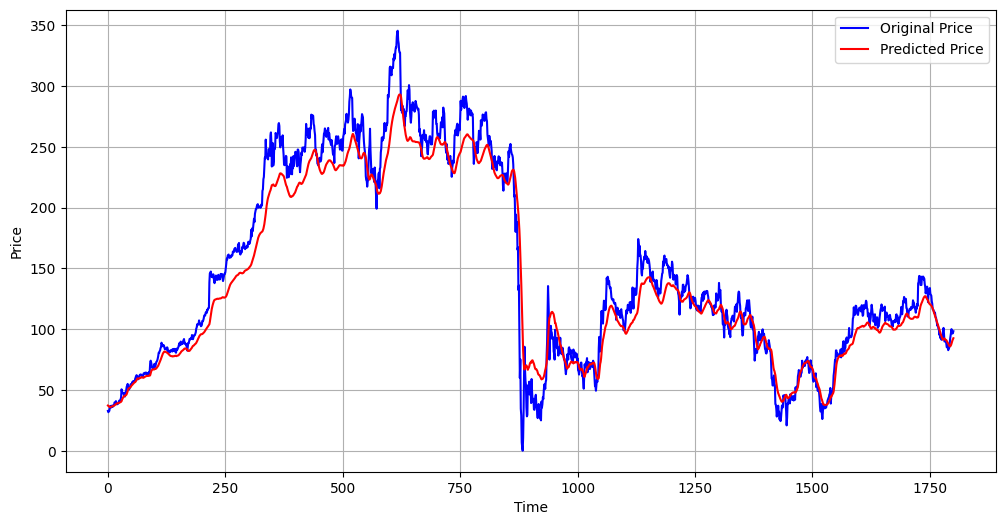

In [ ]:

plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 9.62%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9431576824411897


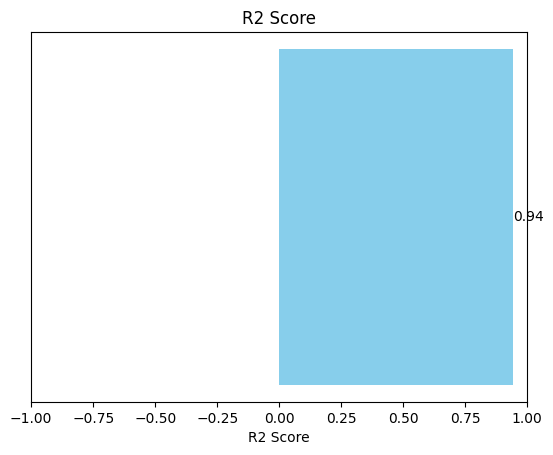

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

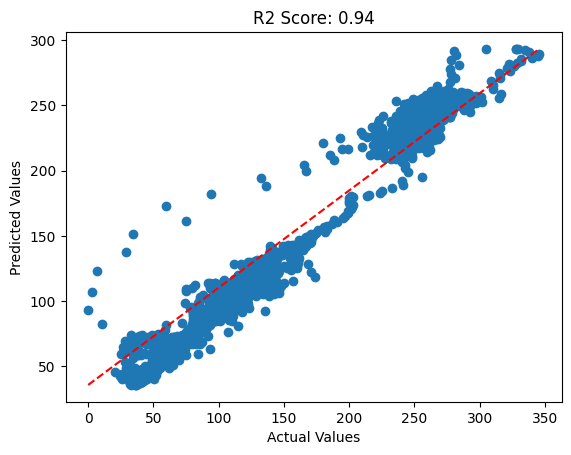

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()